<a href="https://colab.research.google.com/github/yeshitha-kuppireddy/acceptanceprediction/blob/main/gradacceptance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df=pd.read_csv('/content/drive/My Drive/grdad.csv')
df[:401]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [3]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [4]:
df.drop_duplicates()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


Text(0.5, 1.0, 'CGPA')

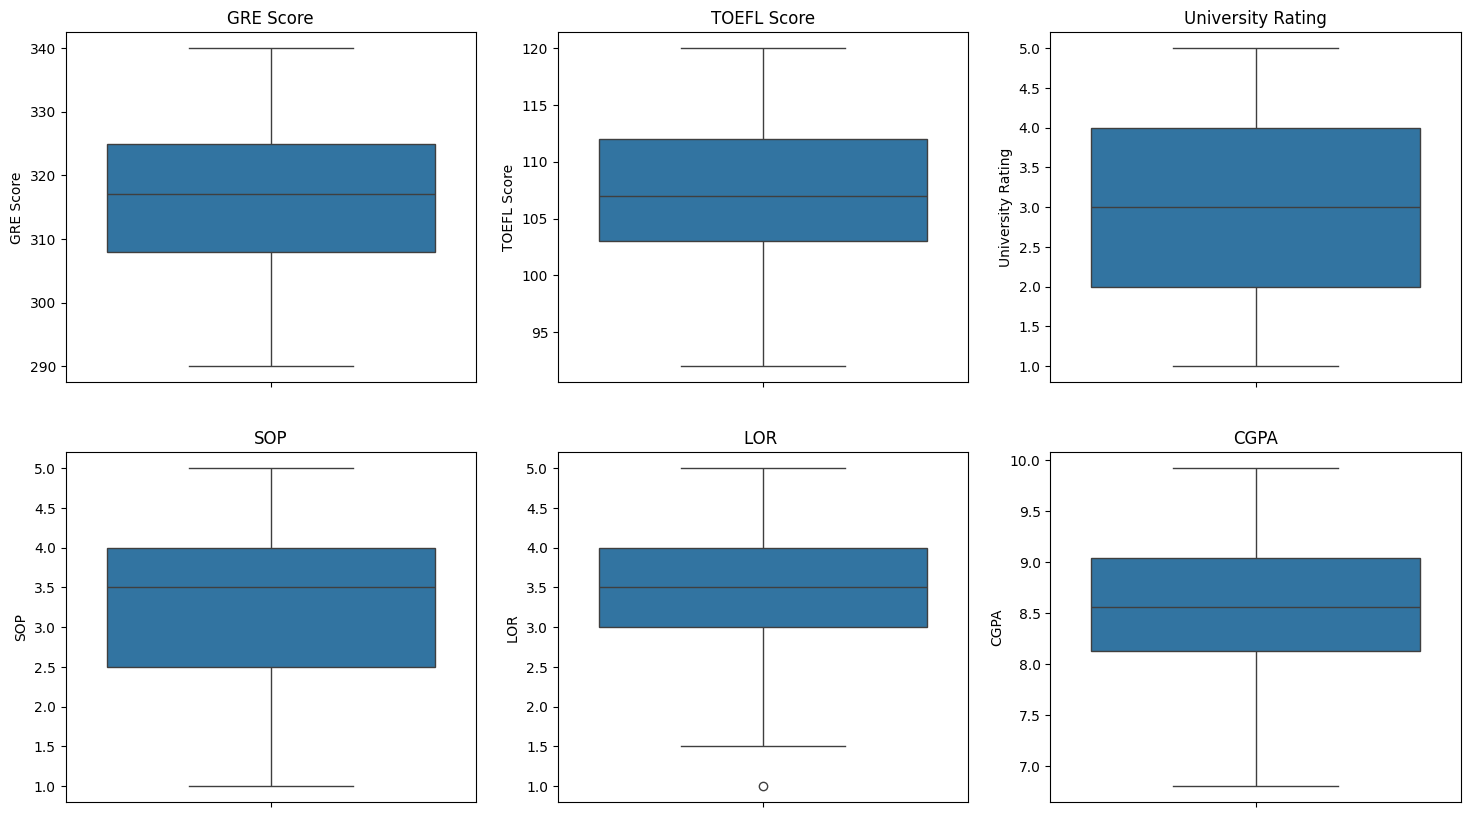

In [5]:
import seaborn as sns
from matplotlib import pyplot as plt
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.boxplot(ax=axes[0, 0], data=df['GRE Score']).set_title('GRE Score')
sns.boxplot(ax=axes[0, 1], data=df['TOEFL Score']).set_title('TOEFL Score')
sns.boxplot(ax=axes[0, 2], data=df['University Rating']).set_title('University Rating')
sns.boxplot(ax=axes[1, 0], data=df['SOP']).set_title('SOP')
sns.boxplot(ax=axes[1, 1], data=df['LOR ']).set_title( 'LOR ')
sns.boxplot(ax=axes[1, 2], data=df['CGPA']).set_title('CGPA')

In [6]:
L = df['LOR '].idxmin()
df.iloc[L]

Serial No.           348.00
GRE Score            299.00
TOEFL Score           94.00
University Rating      1.00
SOP                    1.00
LOR                    1.00
CGPA                   7.34
Research               0.00
Chance of Admit        0.42
Name: 347, dtype: float64

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=df[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']]
x_scaled = scaler.fit_transform(x)
x = pd.DataFrame(x_scaled, columns=x.columns)

In [29]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152
...,...,...,...,...,...,...,...
495,1.376126,0.132987,1.650957,1.137360,0.558125,0.734118,0.886405
496,1.819238,1.614278,1.650957,1.642404,1.639763,2.140919,0.886405
497,1.198882,2.108041,1.650957,1.137360,1.639763,1.627851,0.886405
498,-0.396319,-0.689952,0.775582,0.632315,1.639763,-0.242367,-1.128152


In [30]:
from sklearn.model_selection import train_test_split

y= df['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [31]:
data={'model_name':[],'r2score':[],'r2score-3foldmax':[],'r2score-5fold max':[],'bias':[],'variance':[]}
metrics=pd.DataFrame(data)
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,explained_variance_score,mean_squared_log_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb

regressors=[['Linear Regression :',LinearRegression()],
       ['lasso',Lasso(alpha=0.1)],
       ['ridge',Ridge(alpha=0.1)],
       ['XGBRegressor',xgb.XGBRegressor()],
       ['Decision Tree Regression :',DecisionTreeRegressor()],
       ['Random Forest Regression :',RandomForestRegressor()],
       ['Gradient Boosting Regression :', GradientBoostingRegressor()],
       ['Ada Boosting Regression :',AdaBoostRegressor()],
       ['Extra Tree Regression :', ExtraTreesRegressor()],
       ['K-Neighbors Regression :',KNeighborsRegressor()],
       ['Support Vector Regression :',SVR()]]
for name,model in regressors:
    model=model
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    r2=r2_score(y_test, predictions)
    r23fold = cross_val_score(model, x, y, cv=3, scoring='r2')
    r25fold = cross_val_score(model, x, y, cv=5, scoring='r2')
    bias=mean_squared_error(y_train, model.predict(X_train))
    variance=mean_squared_error(y_test, model.predict(X_test))
    metrics.loc[len(metrics)] =[name,r2,max(r23fold),max(r25fold),bias,variance]


In [32]:
metrics

,model_name,r2score,r2score-3foldmax,r2score-5fold max,bias,variance
0,Linear Regression :,0.818843,0.870092,0.898287,3.526555e-03,0.003705
1,lasso,0.260630,0.340934,0.309828,1.463325e-02,0.015120
2,ridge,0.818839,0.870094,0.898308,3.526556e-03,0.003705
3,XGBRegressor,0.746692,0.741314,0.825675,6.432596e-06,0.005180
4,Decision Tree Regression :,0.591443,0.670004,0.664649,2.773339e-34,0.008355
5,Random Forest Regression :,0.794284,0.823259,0.871760,5.952879e-04,0.004207
6,Gradient Boosting Regression :,0.780720,0.816616,0.877659,1.476261e-03,0.004484
7,Ada Boosting Regression :,0.754091,0.780644,0.796398,3.586838e-03,0.005029
8,Extra Tree Regression :,0.791509,0.831013,0.862788,9.987796e-31,0.004264
9,K-Neighbors Regression :,0.784804,0.795663,0.842821,2.804520e-03,0.004401


In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x, y, cv=5)
scores

array([0.59035698, 0.61118592, 0.7533168 , 0.69093492, 0.78055221])

In [34]:
import numpy as np
df['logy'] = np.log(df['Chance of Admit ']/(1-df['Chance of Admit '])) # Add a new column 'C' with values from 'A' * 2

In [35]:
X_train, X_test, logy_train, logy_test = train_test_split(x,df['logy'], test_size=0.2, random_state=42)

In [36]:
model2 = LinearRegression()
model2.fit(X_train, logy_train)
y_pred = model2.predict(X_test)
print("Accuracy:",r2_score(np.array(logy_test),y_pred))

Accuracy: 0.8265604658785266


In [37]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(x)
X_trp, X_tep, y_trp, y_tep = train_test_split(X_poly,y, test_size=0.2, random_state=42)
pr=LinearRegression()
pr.fit(X_trp,y_trp)
y_pr=pr.predict(X_tep)
print(r2_score(y_tep,y_pr))

0.8264997478583239


In [38]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pr, x, y, cv=10)
scores

array([0.76390382, 0.63426778, 0.80122649, 0.75336609, 0.87074079,
       0.87588857, 0.8181535 , 0.81939049, 0.91960608, 0.87468016])

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
lm=LinearRegression()

clf = LassoCV().fit(X_train, y_train)  # applying lasso
importance = np.abs(clf.coef_)
print(importance)
feature_names=['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']
idx_third = importance.argsort()[-3]
threshold = importance[idx_third] + 0.01

idx_features = (-importance).argsort()[:4]
name_features = np.array(feature_names)[idx_features]
print('Selected features: {}'.format(name_features))

sfm = SelectFromModel(clf, threshold=threshold)
sfm.fit(X_train, y_train)
X_transform = sfm.transform(X_train)

n_features = sfm.transform(X_train).shape[1]

def feature_select(df,i):
    X_train, X_test, y_train, y_test = train_test_split(df,y,test_size=0.2,random_state = i)
    scaler = StandardScaler()
    scaler.fit(X_train.fillna(0))
    clf = LassoCV().fit(X_train, y_train)
    importance = np.abs(clf.coef_)
    feature_names=X_train.columns
    idx_third = importance.argsort()[-3]
    threshold = importance[idx_third] + 0.01

    idx_features = (-importance).argsort()[:4]
    name_features = np.array(feature_names)[idx_features]

    linear_model = lm.fit(X_train[name_features], y_train)
    predictions = lm.predict(X_test[name_features])
    return linear_model.score(X_test[name_features], y_test)

sfm.fit(X_train, y_train)
var_sel_X = X_train[name_features]
lin_m2 = lm.fit(var_sel_X, y_train)
predictions2 = lm.predict(X_test[name_features])
r2_score(y_test,predictions2)

[0.02734643 0.01805435 0.00282878 0.00166963 0.01564066 0.06810809
 0.01159053]
Selected features: ['CGPA' 'GRE Score' 'TOEFL Score' 'LOR ']


0.8081268122249509